# Project Code

In [1]:
# from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv1D, MaxPool1D, SimpleRNN
# from tensorflow.keras.optimizers import Adam
# import plotly.graph_objects as go
# from matplotlib import pyplot
# import numpy as np

### Data load

In [2]:
import pandas as pd
from collections import Counter
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv1D, MaxPool1D, SimpleRNN
from tensorflow.keras.optimizers import Adam

# Read the 'creditcard.csv' file into df DataFrame
df = pd.read_csv('creditcard.csv')

# Display the last few rows of df_test DataFrame
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [3]:
# This is a smaller sample for training to test the code.
df_test = df[(df['Class']==0)].sample(10000)
df_test = df_test.append(df[(df['Class']==1)].sample(200))

C:\Users\yzmytrakov\AppData\Local\Temp\ipykernel_23068\3389953456.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df[(df['Class']==1)].sample(200))


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
import warnings
import seaborn as sns

# Ignore warning messages
warnings.filterwarnings("ignore")

# Set Seaborn plot style to "whitegrid"
sns.set_style("whitegrid")

# Data Prepocessing

In [6]:
# Display the shape of the DataFrame (number of rows and columns)
print("DataFrame Shape:", df.shape)

# Display the column names of the DataFrame
print("Column Names:", df.columns)

# Display the summary information of the DataFrame
print("\nDataFrame Info:")
print(df.info())

DataFrame Shape: (284807, 31)
Column Names: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  f

##### Based on your statement, it appears that you have already executed the code and found that there are 1081 duplicate rows in your dataset.

In [7]:
# Get the shape of the DataFrame con-taining only the duplicate rows
duplicate_rows_df_shape = df_test[df_test.duplicated()].shape

print("Shape of DataFrame containing only duplicate rows:", duplicate_rows_df_shape)

Shape of DataFrame containing only duplicate rows: (8, 31)


In [8]:
# Remove duplicates from the original DataFrame 'df' in place
df_test.drop_duplicates(inplace=True)

# Display the first few rows of the DataFrame after removing duplicates
print(df_test.head())

            Time        V1        V2        V3        V4        V5        V6  \
209093  137411.0 -0.602930  0.014665  1.315931 -0.871010  0.375122 -0.202562   
29825    35646.0  1.063656 -0.055702  0.973494  1.502455 -0.616099  0.166537   
88242    62055.0  1.131418 -0.488774  0.689634  0.441093 -0.918741 -0.204635   
129789   79214.0 -2.215132  0.304942  1.659242 -0.564950 -0.468577 -0.904371   
99076    66952.0 -0.887891  1.475283  0.395789 -0.170736  0.204617 -0.491858   

              V7        V8        V9  ...       V21       V22       V23  \
209093  0.087552 -0.013125 -1.579309  ... -0.356165 -0.606181 -0.225027   
29825  -0.299278  0.113368  0.455082  ... -0.031632  0.196806 -0.151372   
88242  -0.452698 -0.016748 -0.913634  ... -0.477041 -1.037598  0.154049   
129789 -0.709207  0.959397  0.206782  ...  0.093304 -0.056577 -0.349862   
99076   0.328177  0.410447 -0.339805  ... -0.317091 -0.892224 -0.101940   

             V24       V25       V26       V27       V28  Amount  Cl

# Initial Analysis

In [9]:
# Count the occurrences of each unique value in the 'Class' column
class_counts = df_test['Class'].value_counts()

print(class_counts)

0    9998
1     194
Name: Class, dtype: int64


In [10]:
# Calculate the statistical summary of the 'Amount' column for non-fraudulent transactions (Class == 0)
non_fraud_amount_summary = df_test[df_test.Class == 0].Amount.describe()

print(non_fraud_amount_summary)

count    9998.000000
mean       85.801847
std       219.312855
min         0.000000
25%         6.157500
50%        22.990000
75%        76.370000
max      4833.000000
Name: Amount, dtype: float64


In [11]:
# Calculate the statistical summary of the 'Amount' column for fraudulent transactions (Class == 1)
fraud_amount_summary = df_test[df_test.Class == 1].Amount.describe()

print(fraud_amount_summary)

count     194.000000
mean      106.367784
std       225.422944
min         0.000000
25%         1.000000
50%         8.420000
75%        99.990000
max      1504.930000
Name: Amount, dtype: float64


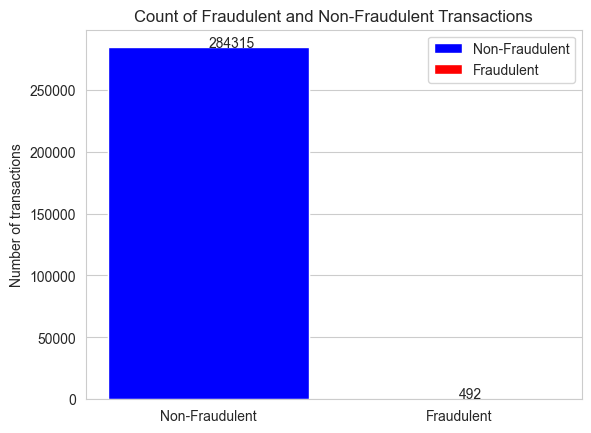

In [12]:
import matplotlib.pyplot as plt

# Define the colors for the count plot (blue for non-fraudulent, red for fraudulent)
colors = ["#0101DF", "#DF0101"]

# Create the count plot
sns.countplot('Class', data=df, palette=colors)

# Set the labels for the x-axis and corresponding ticks
plt.xlabel(None)
plt.ylabel("Number of transactions")
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.title("Count of Fraudulent and Non-Fraudulent Transactions")

bars = plt.bar([0, 1], [284315, 492], color=['blue', 'red'])
plt.legend(bars, ['Non-Fraudulent', 'Fraudulent'], loc='upper right')

# Add count labels above each bar
for i, count in enumerate([284315, 492]):
    plt.text(i, count, str(count))

# Display the plot
plt.show()

### Outlier Detection

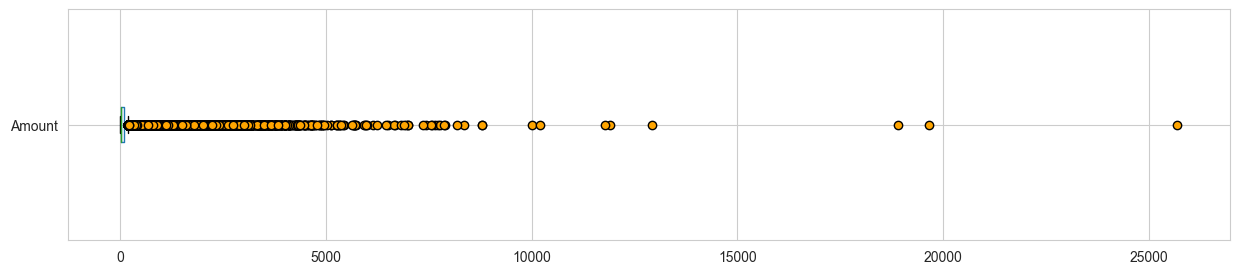

In [13]:
import matplotlib.pyplot as plt

# Set the figure size for the box plot
plt.figure(figsize=[15, 3])

# Customizing box plot colors
boxplot_properties = dict(boxprops=dict(color='blue', linewidth=2),
                          whiskerprops=dict(color='green', linewidth=2),
                          capprops=dict(color='red', linewidth=2),
                          medianprops=dict(color='black', linewidth=2),
                          flierprops=dict(markerfacecolor='orange', marker='o'))

# Create the box plot for the 'Amount' column with customized colors
df.boxplot(column=['Amount'], vert=False, flierprops=boxplot_properties['flierprops'])

# Display the plot
plt.show()

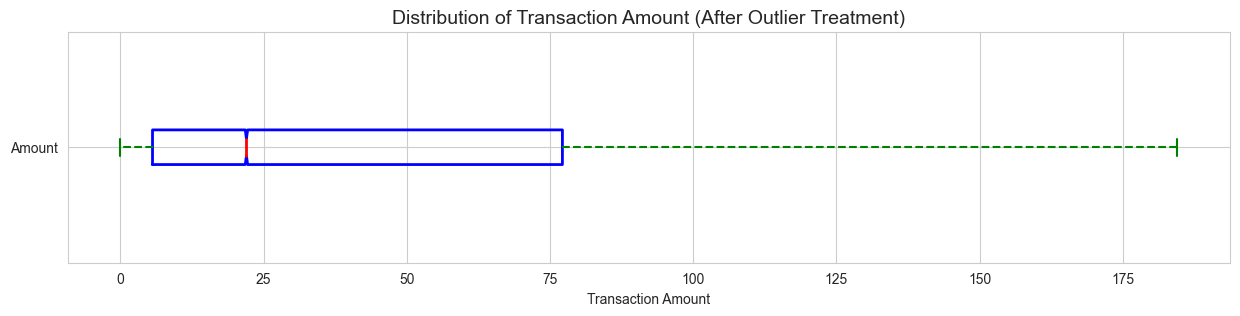

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate quartiles and IQR for the 'Amount' column
q1 = df['Amount'].quantile(0.25)
q3 = df['Amount'].quantile(0.75)
iqr = q3 - q1

# Calculate lower and upper bounds for outliers
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr

# Clip the 'Amount' column to the lower and upper bounds to handle outliers
df['Amount'] = df['Amount'].clip(lower=lower_tail, upper=upper_tail)

# Set the figure size for the box plot
plt.figure(figsize=[15, 3])

# Create the horizontal box plot for the 'Amount' column after outlier treatment with notches
df.boxplot(column=['Amount'], vert=False, notch=True, boxprops=dict(color='blue', linewidth=2),
           whiskerprops=dict(color='green', linewidth=1.5, linestyle='--'),
           capprops=dict(color='green', linewidth=1.5),
           medianprops=dict(color='red', linewidth=2),
           flierprops=dict(marker='o', markerfacecolor='green', markersize=8))

# Add a title and axis labels
plt.title('Distribution of Transaction Amount (After Outlier Treatment)', fontsize=14)
plt.xlabel('Transaction Amount')
plt.ylabel('')

# Display the plot
plt.show()

##### Distribution of Transaction Amounts per class

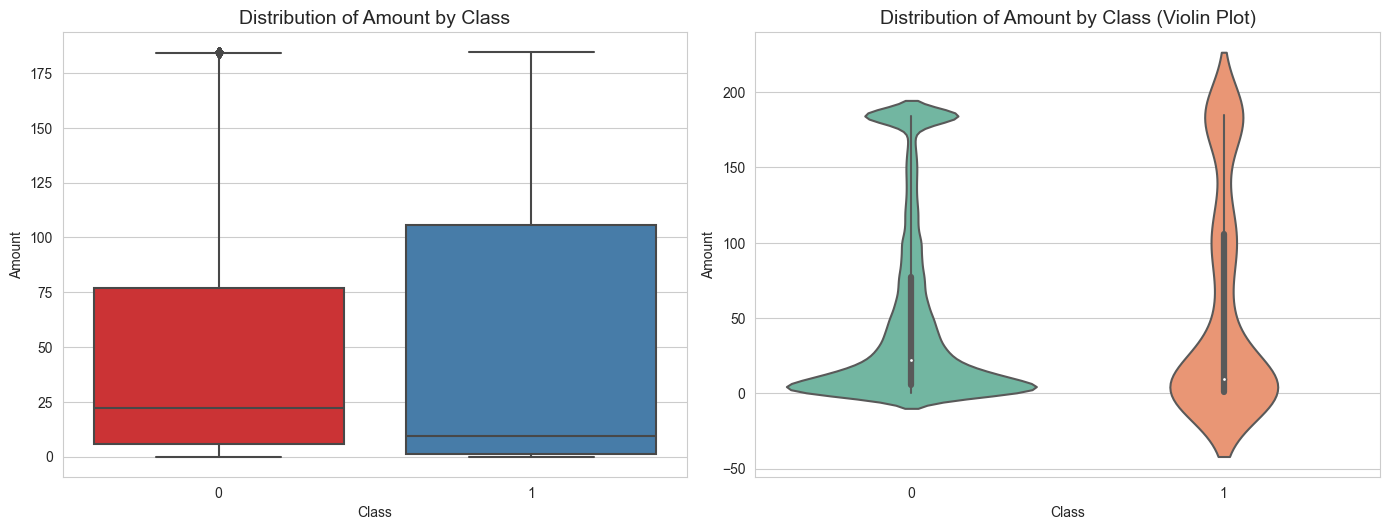

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for the subplot
plt.figure(figsize=(14, 10))

# Create the first subplot (1 row, 2 columns, first plot)
plt.subplot(2, 2, 1)

# Create a box plot for the 'Amount' column grouped by 'Class'
sns.boxplot(x='Class', y='Amount', data=df, palette='Set1')

# Set the title, x-axis label, and y-axis label for the first subplot
plt.title('Distribution of Amount by Class', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Amount')

# Create the second subplot (1 row, 2 columns, second plot)
plt.subplot(2, 2, 2)

# Create a violin plot for the 'Amount' column grouped by 'Class'
sns.violinplot(x='Class', y='Amount', data=df, palette='Set2')

# Set the title, x-axis label, and y-axis label for the fourth subplot
plt.title('Distribution of Amount by Class (Violin Plot)', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Amount')

# Adjust the layout to prevent overlapping titles
plt.tight_layout()

# Display the plots
plt.show()

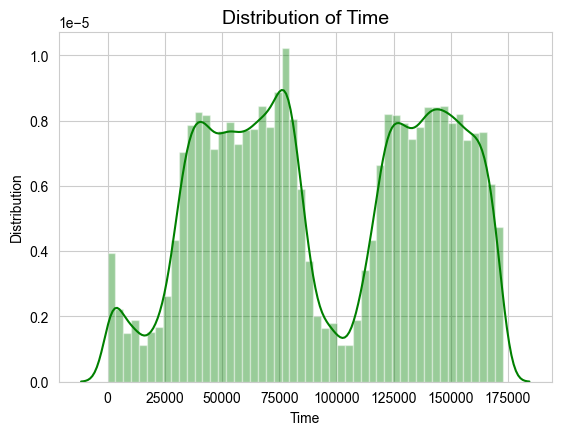

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for the subplot
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)

# Create the distribution plot for the 'Time' column with a different color
sns.distplot(df['Time'], color='green')

# Set the title, x-axis label, and y-axis label for the first subplot
plt.title('Distribution of Time', fontsize=14, color='black')
plt.xlabel('Time', color='black')
plt.ylabel('Distribution', color='black')

# Customize the tick colors for x-axis and y-axis
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')

# Display the plot
plt.show()

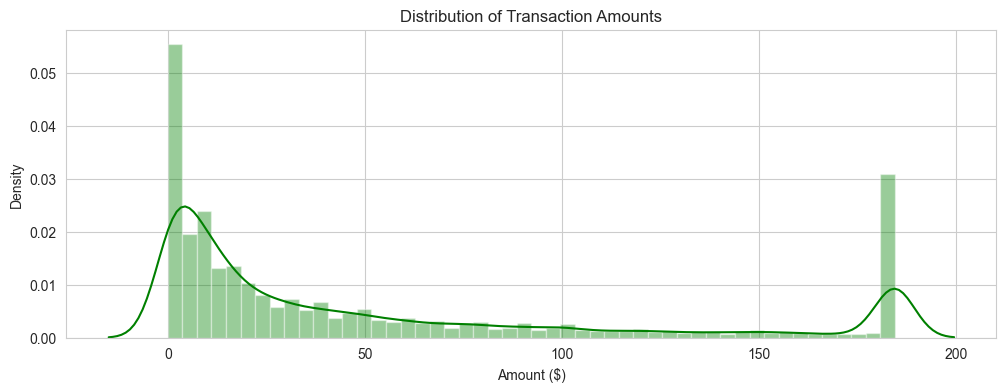

In [17]:
# Filter the DataFrame 'df' to get only rows where 'Amount' is less than 200
df3 = df[df['Amount'] < 200]

# Set the figure size for the plot
plt.figure(figsize=(12, 4))

# Create the distribution plot for the 'Amount' column in df3 with a blue color
sns.distplot(df3['Amount'], color='green')

# Set the title, x-axis label, and y-axis label for the plot
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount ($)')

# Display the plot
plt.show()

## Bivariate Analysis

### correlation investication among features

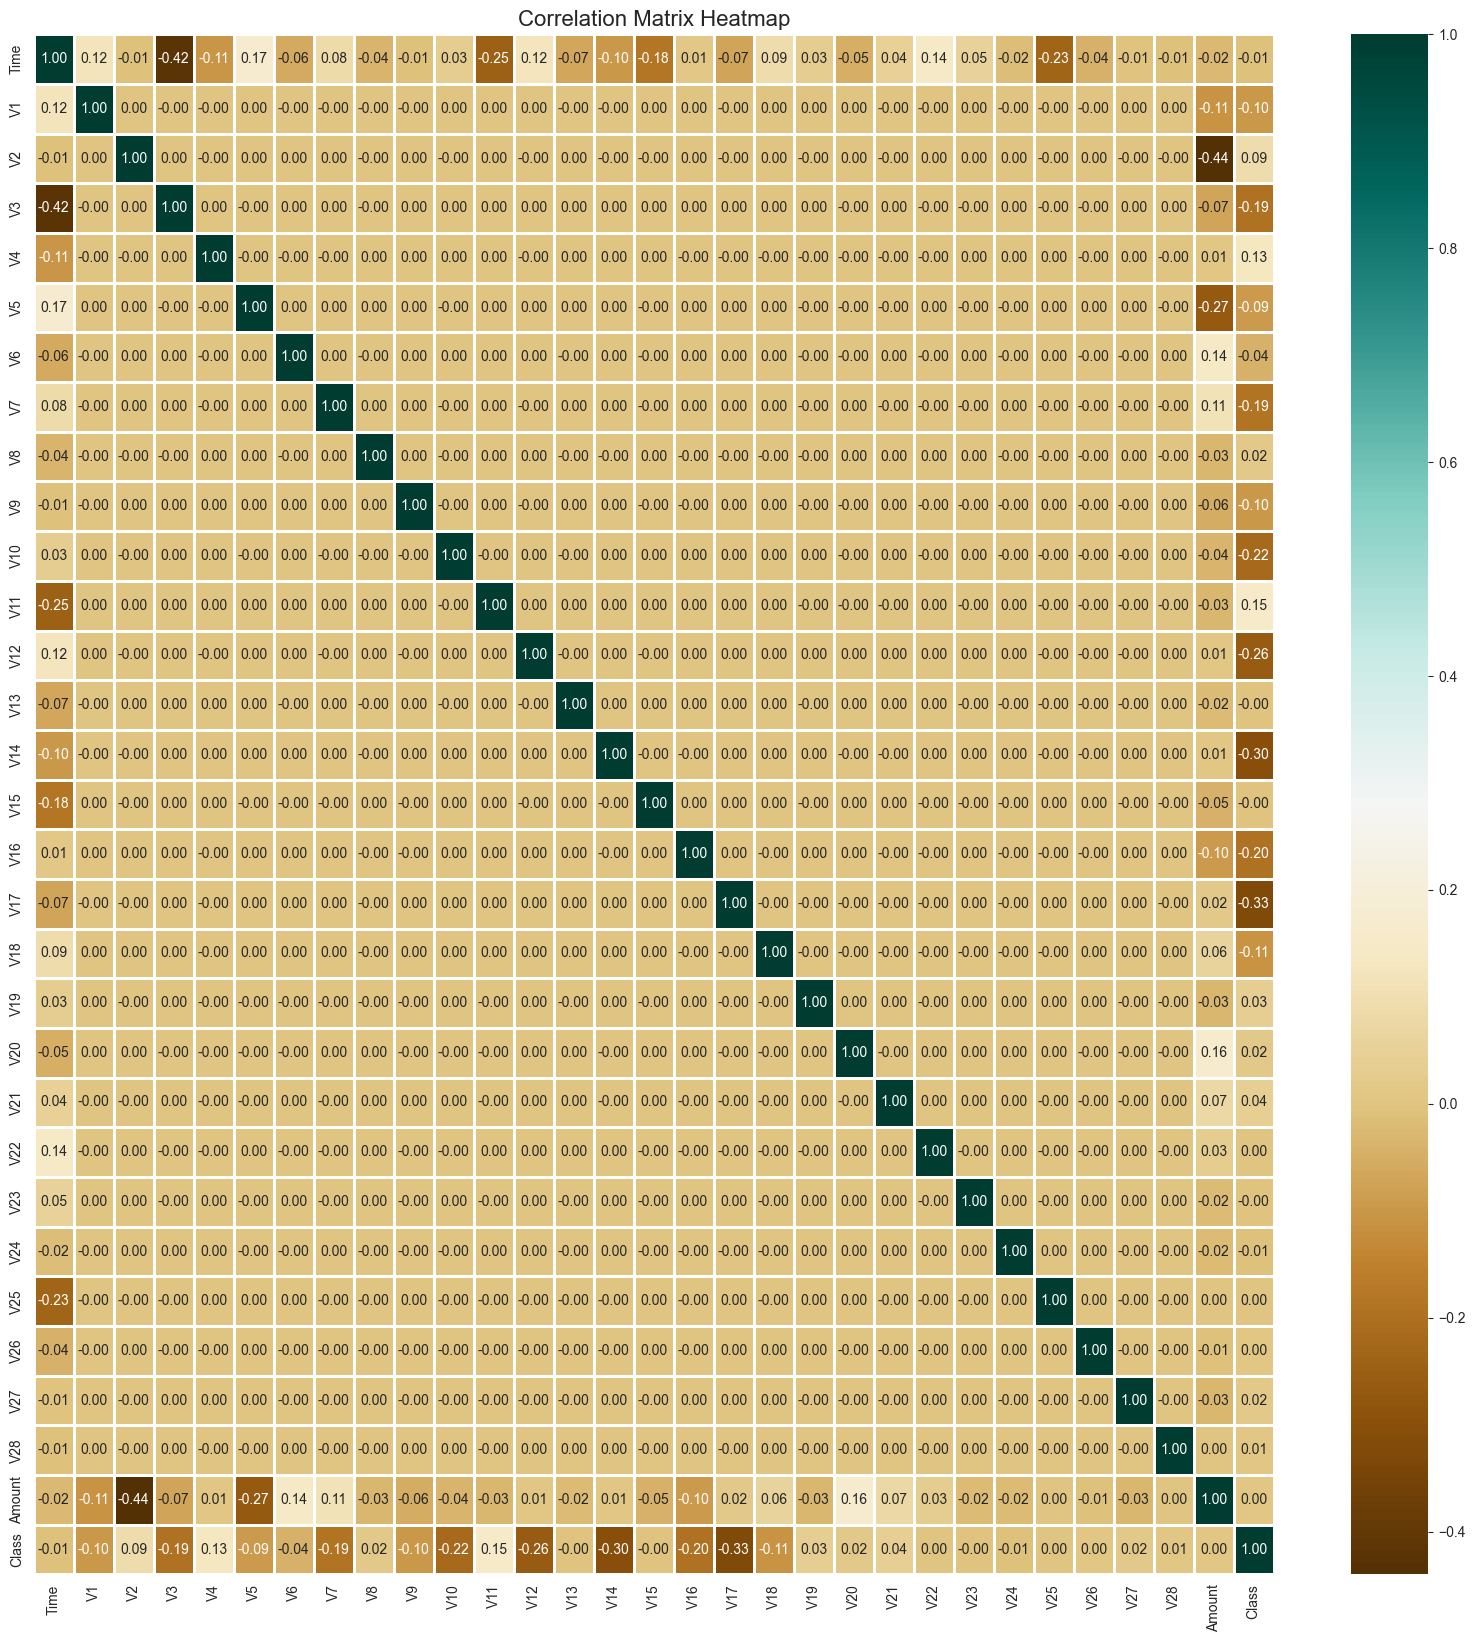

In [18]:
# Set the figure size for the heatmap
plt.figure(figsize=(20, 20))

# Create the heatmap for the correlation matrix of the DataFrame
sns.heatmap(data=df.corr(), cmap="BrBG", linewidths=2, annot=True, fmt=".2f", annot_kws={"size": 10})

# Set the title for the heatmap
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Display the heatmap
plt.show()

#### Distribution Plot with Class variable: 

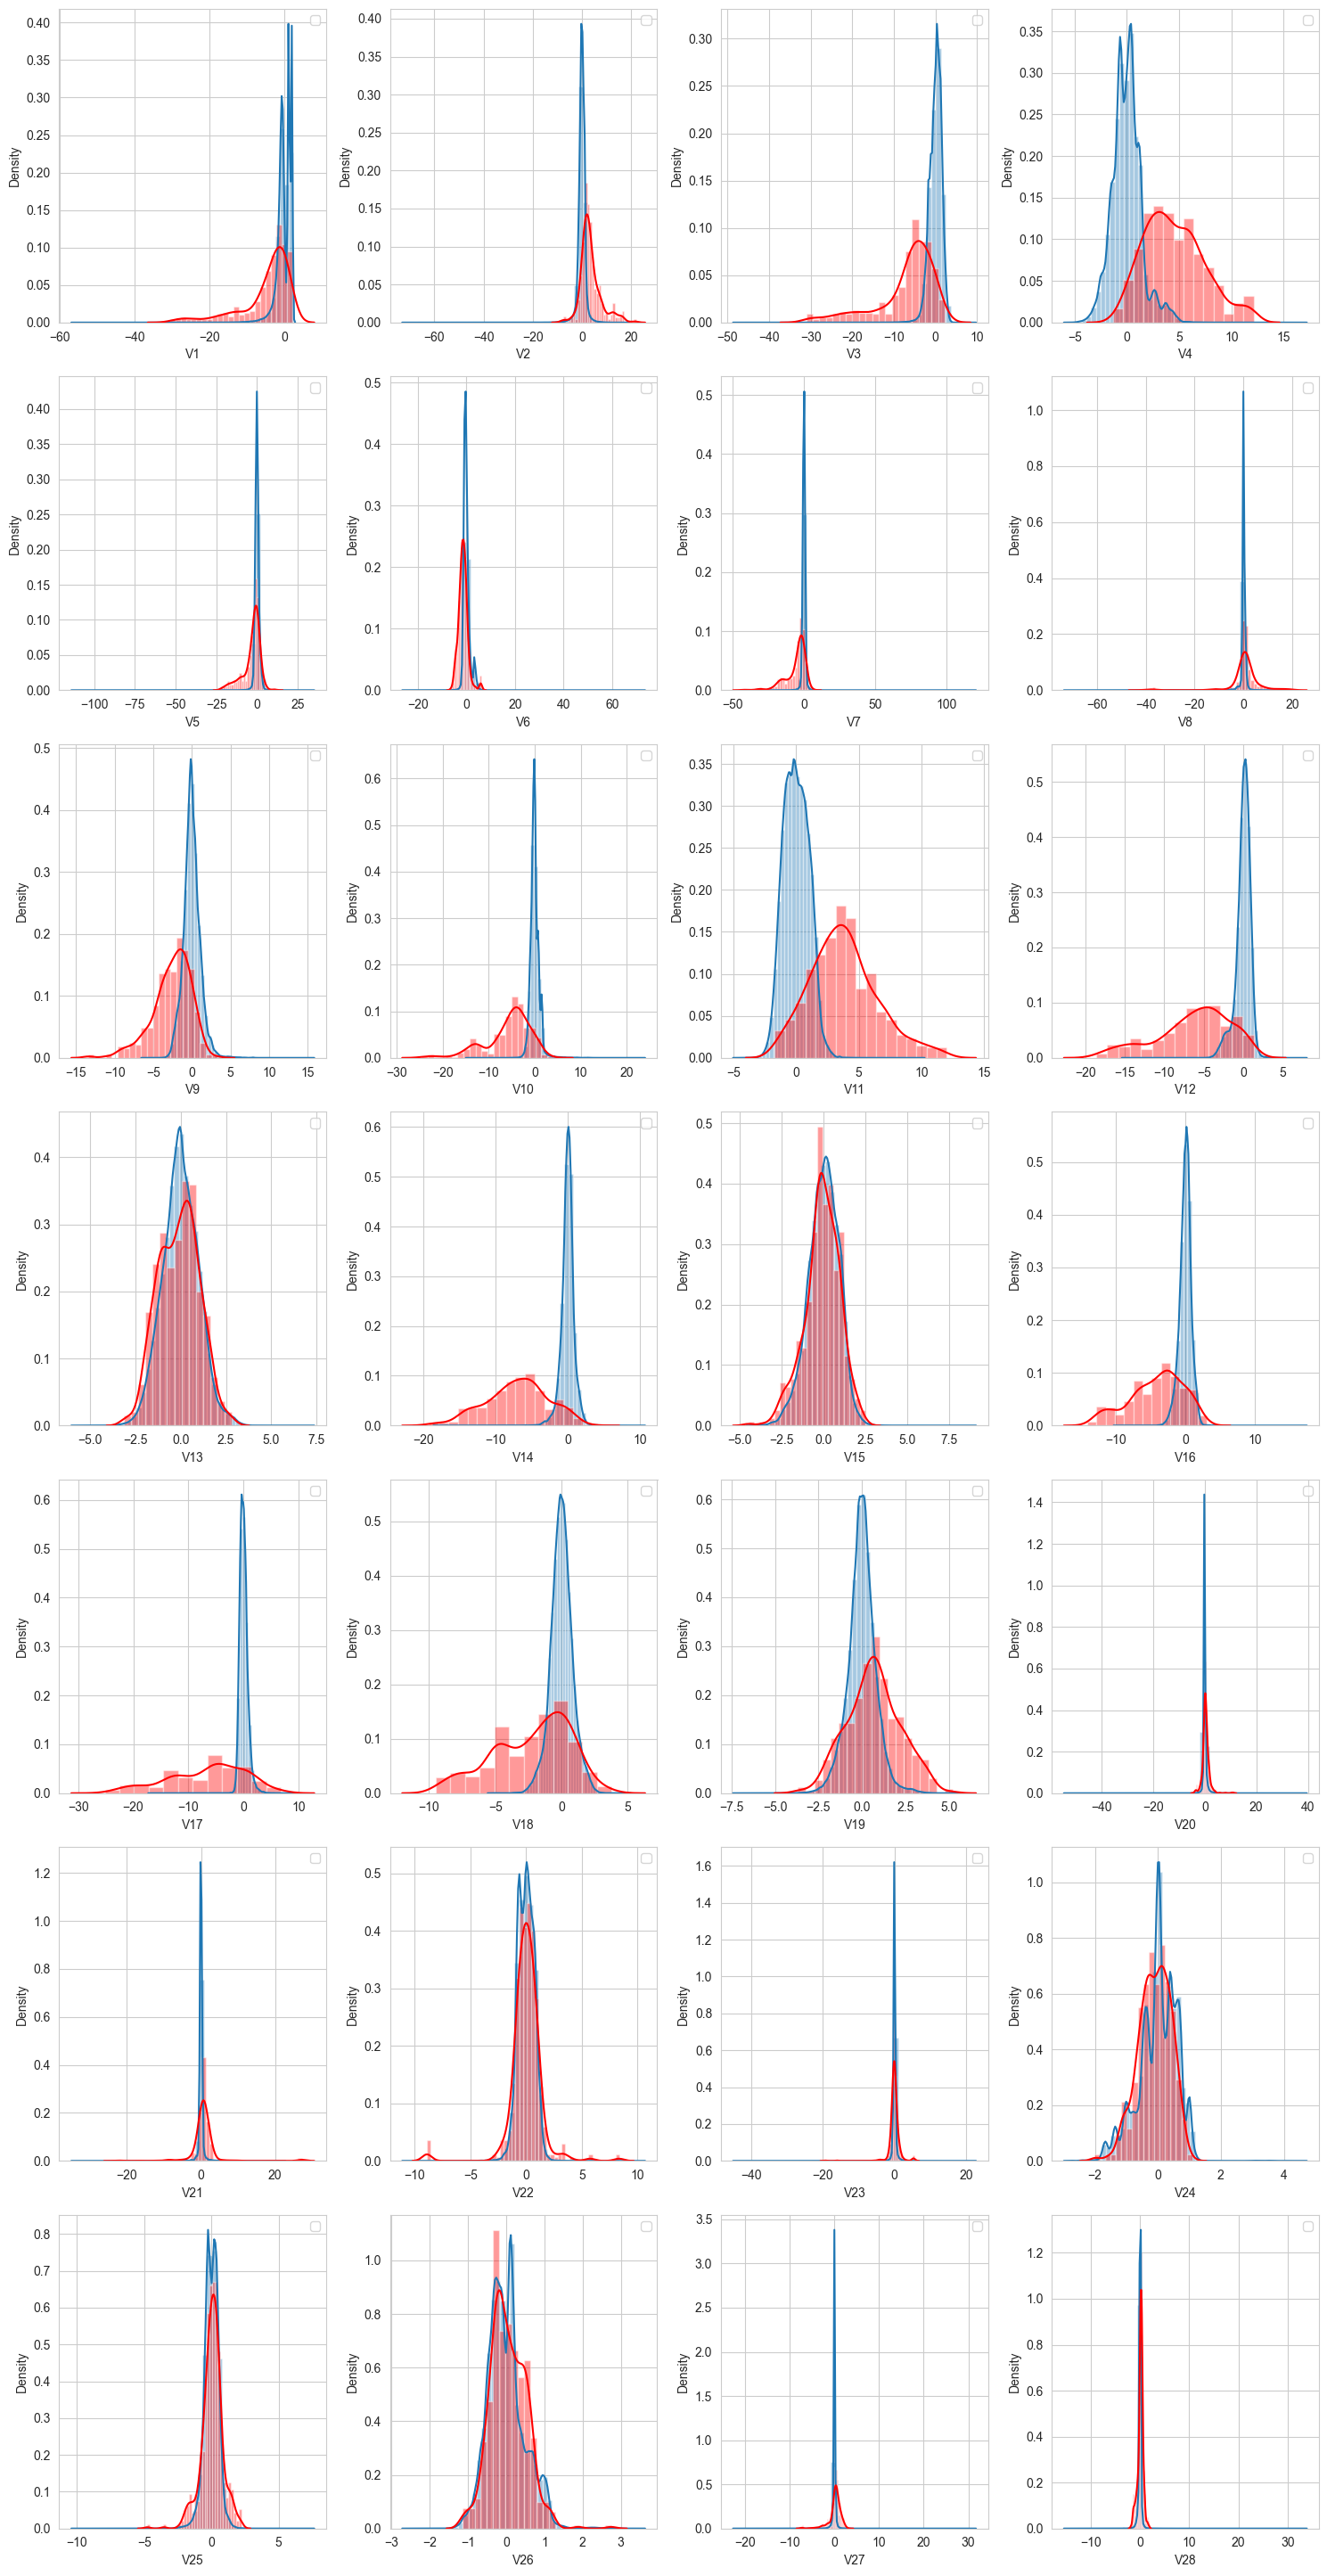

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select columns with 'V1-32' in the name and the 'Class' column from the DataFrame
V = df[[col for col in df.columns if 'V' in col] + ['Class']]

# Set the figure size for the plot
f, ax = plt.subplots(ncols=4, nrows=7, figsize=(15, 1 * len(V.columns)))

for i, c in zip(ax.flatten(), V.columns):
    # Set the legend for each subplot
    i.legend(labels=['Fraudulent', 'Non-fraudulent'])
    
    sns.distplot(V[c][V['Class'] == 0], ax=i)  # Genuine
    sns.distplot(V[c][V['Class'] == 1], color='red', ax=i)  # Fraud

# Adjust layout to avoid overlapping titles
f.tight_layout()

# Show the plot
plt.show()

### Genuine and Fraud Classes Ditrbibution over Time

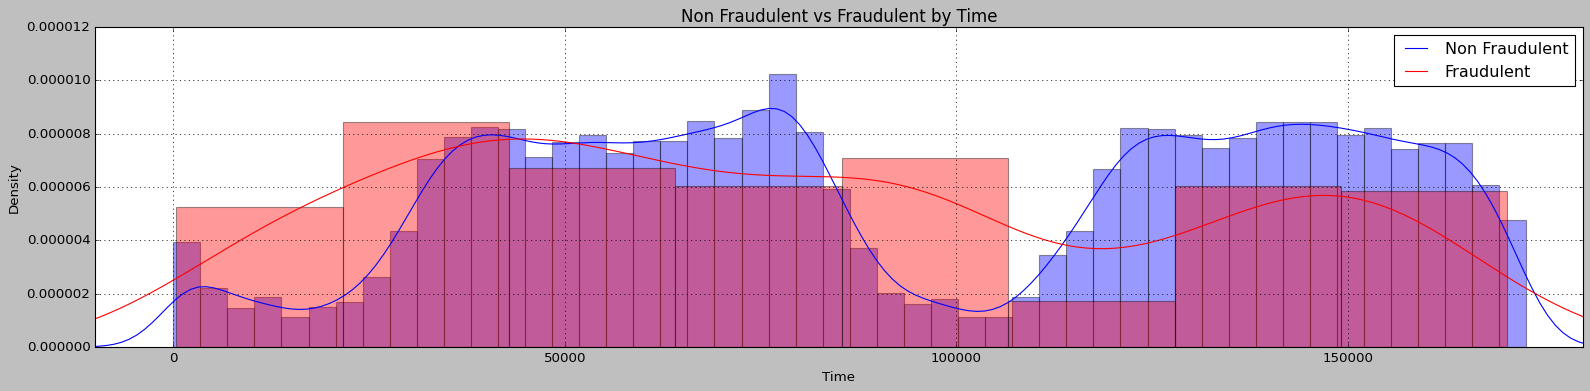

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("classic")
plt.figure(figsize=(24, 5))

# Plot the distribution of 'Time' for Genuine transactions (Class == 0) in blue
sns.distplot(df[df['Class'] == 0]['Time'], color='blue')

# Plot the distribution of 'Time' for Fraudulent transactions (Class == 1) in red
sns.distplot(df[df['Class'] == 1]['Time'], color='red')

plt.title('Non Fraudulent vs Fraudulent by Time', fontsize=15)
plt.xlim([-10000, 180000])
plt.grid(linewidth=0.7)

# Add a legend for the two classes
plt.legend(['Non Fraudulent', 'Fraudulent'])

plt.show()

## Multivariate Analysis

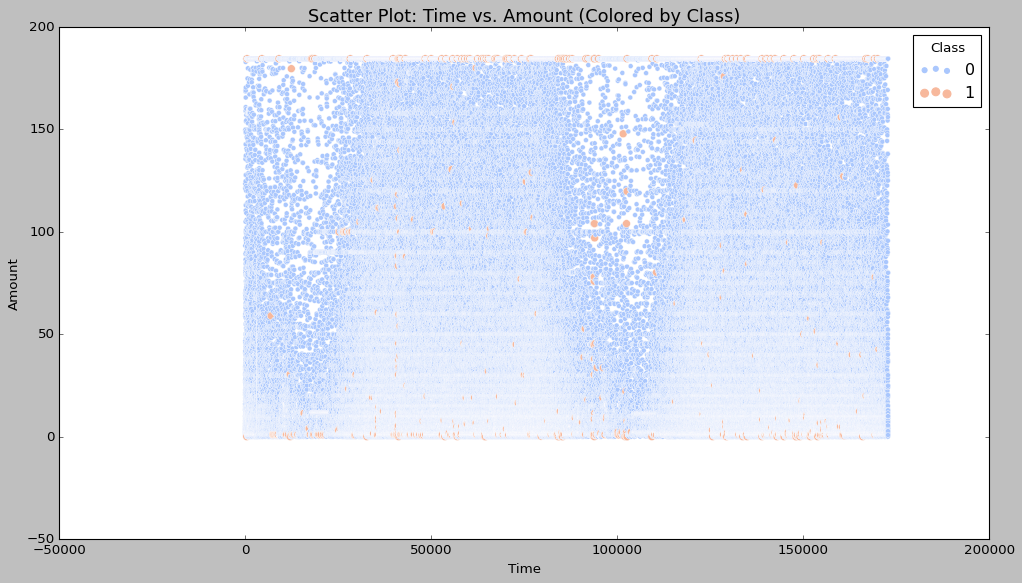

In [21]:
# Set the figure size for the scatter plot
plt.figure(figsize=(15, 8))

# Create the scatter plot for 'Time' vs. 'Amount' with different colors, sizes, and cross markers based on 'Class'
sns.scatterplot(data=df, x="Time", y="Amount", hue="Class", size="Class", sizes=(50, 20), markers='+', palette="coolwarm", alpha=1)

# Set the title for the scatter plot
plt.title('Scatter Plot: Time vs. Amount (Colored by Class)', fontsize=16)

# Display the scatter plot
plt.show()

# Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
sc = StandardScaler()

# Standardize the 'Time' and 'Amount' columns in the DataFrame df
df_test[['Time', 'Amount']] = sc.fit_transform(df_test[['Time', 'Amount']])

# Handling Imbalance Data

In [23]:
# Separate the features (Data) and target variable (Target)
Data = df_test.drop('Class', axis=1)  # DataFrame containing all columns except 'Class'
Target = df_test['Class']  # Series containing only the 'Class' column

# Print the shape of the Data DataFrame and the Target Series
print('Shape of Data:', Data.shape)
print('Shape of Target:', Target.shape)

Shape of Data: (10192, 30)
Shape of Target: (10192,)


##### SMOTE works by generating synthetic samples for the minority class by interpolating between existing minority class instances

In [24]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE with a specified random state for reproducibility
oversample = SMOTE(random_state=99)

# Perform oversampling using SMOTE on the Data and Target
Data_new, Target_new = oversample.fit_resample(Data, Target)

# Print the shape of Data and Target after oversampling
print('Shape of Data after oversampling:', Data_new.shape)
print('Shape of Target after oversampling:', Target_new.shape)

Shape of Data after oversampling: (19996, 30)
Shape of Target after oversampling: (19996,)


### Class Distribution of Balanced Data

In [25]:
print('SMOT: {}'.format(Counter(Target_new)))

SMOT: Counter({0: 9998, 1: 9998})


##### Split the data into 80% training set and 20% test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data_new, Target_new, test_size=0.2, random_state=99)

# Machine Learning Models

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

def model_evaluate(model, X_train, X_test, y_train, y_test):
    
    # Print the name of the model being evaluated
    print("Model Name:", model.__class__.__name__)
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Evaluate the model accuracy on the test data
    acc = model.score(X_test, y_test)
    print("ACCURACY SCORE: {:.2f}".format(acc))    
    # Evaluate the model training score on the training data
    train_score = model.score(X_train, y_train)
    print("Training Score: {:.2f}".format(train_score))
    
    # Make predictions on the test data
    y_prediction = model.predict(X_test)
    
    # Calculate the confusion matrix to assess the model's performance
    com_decision = confusion_matrix(y_test, y_prediction)
    print("Confusion Matrix:")
    print(com_decision)
    
    # Calculate various evaluation metrics: accuracy, error rate, specificity, and sensitivity
    accuracy_model = ((com_decision[0][0] + com_decision[1][1]) / com_decision.sum()) * 100
    error_rate_model = ((com_decision[0][1] + com_decision[1][0]) / com_decision.sum()) * 100
    specificity_model = (com_decision[1][1] / (com_decision[1][1] + com_decision[0][1])) * 100
    sensitivity_model = (com_decision[0][0] / (com_decision[0][0] + com_decision[1][0])) * 100
    print('Accuracy Decision: {:.2f}'.format(accuracy_model))
    print('Error Rate Decision: {:.2f}'.format(error_rate_model))
    print('Specificity Decision: {:.2f}'.format(specificity_model))
    print('Sensitivity Decision: {:.2f}'.format(sensitivity_model))
    
    # Display the classification report showing precision, recall, f1-score, and support for each class
    print("CLASSIFICATION REPORT:")
    class_report = classification_report(y_test, y_prediction)
    print(class_report)
    print('\n--------------------------------------------------------------\n')
    
    # Return the confusion matrix for further analysis if needed
    return com_decision

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Create instances of the models
lr = LogisticRegression()
svm = SVC()
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier(max_samples=0.75)
knn = KNeighborsClassifier(n_neighbors=6)

# List of models
models = [lr, svm, dt, rf, knn]

# Loop through each model and evaluate its performance
for model in models:
    model_evaluate(model, X_train, X_test, y_train, y_test)

Model Name: LogisticRegression
ACCURACY SCORE: 0.94
Training Score: 0.94
Confusion Matrix:
[[1988   76]
 [ 180 1756]]
Accuracy Decision: 93.60
Error Rate Decision: 6.40
Specificity Decision: 95.85
Sensitivity Decision: 91.70
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2064
           1       0.96      0.91      0.93      1936

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000


--------------------------------------------------------------

Model Name: SVC
ACCURACY SCORE: 0.95
Training Score: 0.95
Confusion Matrix:
[[2030   34]
 [ 183 1753]]
Accuracy Decision: 94.58
Error Rate Decision: 5.42
Specificity Decision: 98.10
Sensitivity Decision: 91.73
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2064
           1      

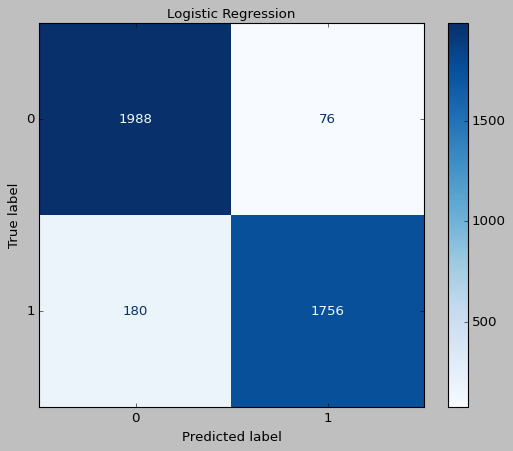

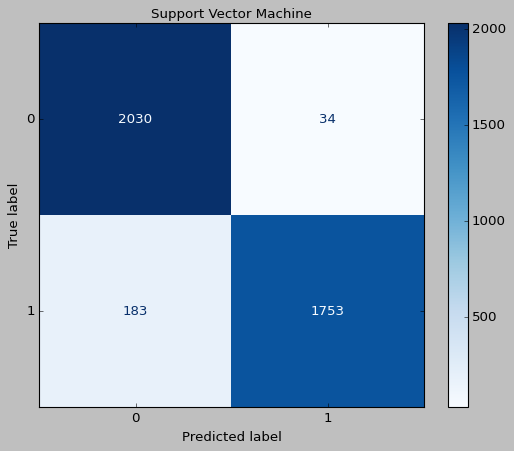

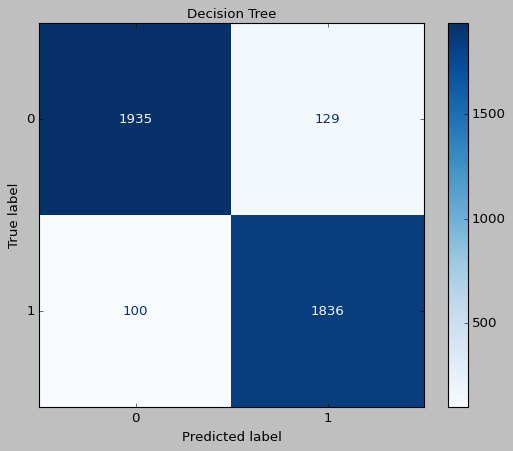

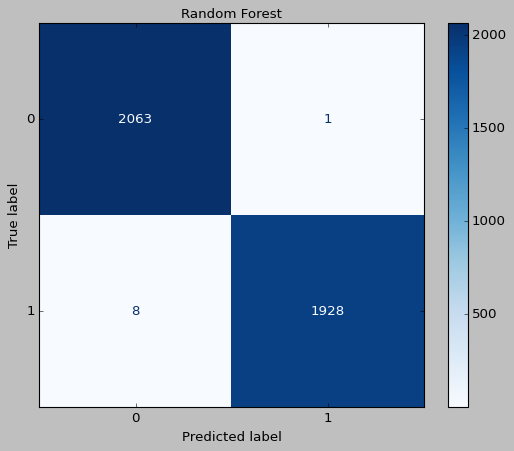

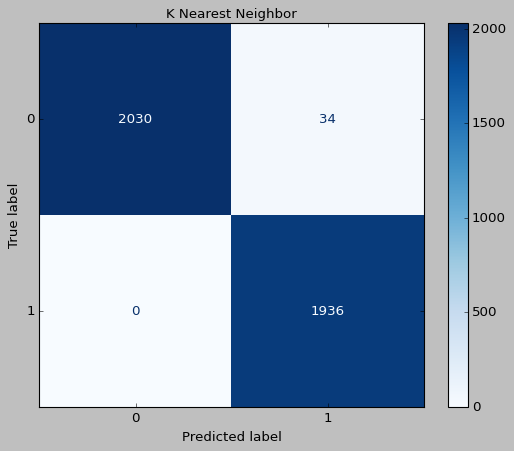

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# List of models and their names
models = [lr, svm, dt, rf, knn]
model_names = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'K Nearest Neighbor']

# Loop through each model and plot the confusion matrix
for model, model_name in zip(models, model_names):
    # Plot the confusion matrix for the current model
    plot_confusion_matrix(model, X_test, y_test, display_labels=model.classes_, cmap='Blues')
    plt.title(model_name, fontsize=12)
    plt.show()

# Deep Learning Models

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def confusion_matrix_calculation(ypred, ytest):

    # Convert the predicted and target labels to lists
    y_target = list(ytest)
    y_prediction = list(ypred)

    # Calculate the confusion matrix
    com_decision = confusion_matrix(y_target, y_prediction)

    # Calculate various evaluation metrics: accuracy, error rate, specificity, and sensitivity
    Accuracy_model = ((com_decision[0][0] + com_decision[1][1]) / com_decision.sum()) * 100
    Error_rate_model = ((com_decision[0][1] + com_decision[1][0]) / com_decision.sum()) * 100
    Specificity_model = (com_decision[1][1] / (com_decision[1][1] + com_decision[0][1])) * 100
    Sensitivity_model = (com_decision[0][0] / (com_decision[0][0] + com_decision[1][0])) * 100

    # Print the confusion matrix and evaluation metrics
    print("Confusion Matrix")
    print(com_decision)
    print('Error Rate     : {:.2f}'.format(Error_rate_model))
    print('Specificity    : {:.2f}'.format(Specificity_model))
    print('Sensitivity    : {:.2f}'.format(Sensitivity_model))
    print('MODEL ACCURACY : {:.2f}'.format(Accuracy_model))
    
    plt.figure(figsize=(8, 6))
    # Visualize the confusion matrix using a heatmap with annotations
    sns.heatmap(com_decision, annot=True, fmt='d', cmap=plt.cm.copper)
    plt.show()


# Artificial neural networks

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler

# Assuming you have already defined X_train, X_test, y_train, and y_test before this code
X_train_ann1 = X_train
X_test_ann1 = X_test
y_train_ann = y_train
y_test_ann = y_test

# Standardize the features using StandardScaler
sc = StandardScaler()
X_train_ann = sc.fit_transform(X_train_ann1)
X_test_ann = sc.transform(X_test_ann1)

# Create the Sequential model
model_ANN = Sequential()

# Input layer with 30 input dimensions and 6 output units (neurons) using ReLU activation function
model_ANN.add(Dense(activation="relu", input_dim=30, units=6, kernel_initializer='uniform'))

# Hidden layer with 20 output units using ReLU activation function
model_ANN.add(Dense(activation="relu", units=20, kernel_initializer='uniform'))

# Hidden layer with 10 output units using ReLU activation function
model_ANN.add(Dense(activation="relu", units=10, kernel_initializer='uniform'))

# Output layer with 1 output unit (for binary classification) using sigmoid activation function
model_ANN.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))

# Print the model summary to see the architecture
model_ANN.summary()

# Compile the model
model_ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data and validate on the test data, epochs tested values = 50, 75, 100
history_ANN = model_ANN.fit(X_train_ann, y_train_ann, validation_data=(X_test_ann, y_test_ann), batch_size=100, epochs=50)

# Optionally, you can save the trained model to a file
# model_ANN.save('model_ANN.hdf5')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 186       
                                                                 
 dense_1 (Dense)             (None, 20)                140       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
160/160 [==============================] - 1s 2ms/step - loss: 0.5415 - accuracy: 0.8284 - val_loss: 0.2605 - val_accuracy: 0.9147
Epoch 2/50
160/160 [============================

In [33]:
# Evaluate the model on the training data
# We are only interested in the accuracy, so it is assigned to the variable train_acc.
# verbose=0 means no progress bar will be displayed during evaluation.
train_loss, train_acc = model_ANN.evaluate(X_train_ann, y_train_ann, verbose=0)

# Evaluate the model on the test data
# We are only interested in the accuracy, so it is assigned to the variable test_acc.
test_loss, test_acc = model_ANN.evaluate(X_test_ann, y_test_ann, verbose=0)

# Print the training and test accuracy
print('Train: %.2f, Test: %.2f' % (train_acc, test_acc))

Train: 0.99, Test: 0.99


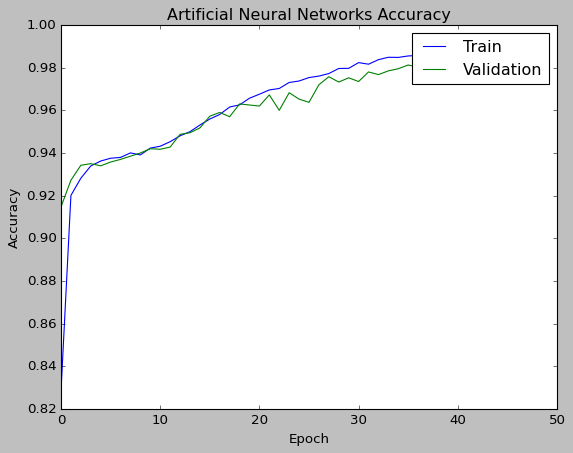

In [34]:
import matplotlib.pyplot as plt

# Plot the training accuracy over epochs
plt.plot(history_ANN.history['accuracy'], label='Train')

# Plot the validation accuracy over epochs
plt.plot(history_ANN.history['val_accuracy'], label='Validation')

# Set the plot title
plt.title('Artificial Neural Networks Accuracy')

# Set the labels for the x and y axes
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Show a legend indicating the line corresponding to each plot
plt.legend()

# Display the plot
plt.show()

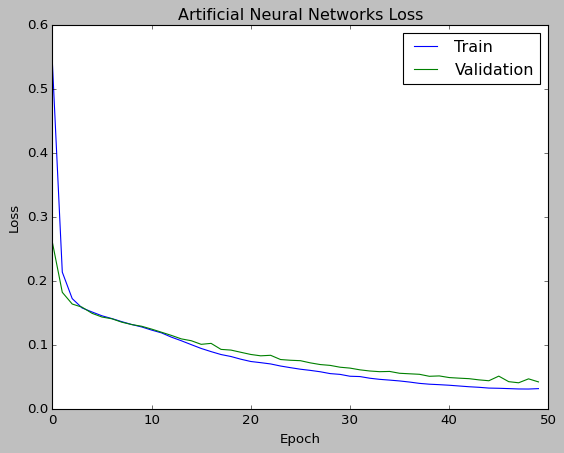

In [35]:
import matplotlib.pyplot as plt

# Plot the training loss over epochs
plt.plot(history_ANN.history['loss'], label='Train')

# Plot the validation loss over epochs
plt.plot(history_ANN.history['val_loss'], label='Validation')

# Set the plot title
plt.title('Artificial Neural Networks Loss')

# Set the labels for the x and y axes
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Show a legend indicating the line corresponding to each plot
plt.legend()

# Display the plot
plt.show()

125/125 [==============================] - 0s 819us/step
Confusion Matrix
[[2016   48]
 [   4 1932]]
Error Rate     : 1.30
Specificity    : 97.58
Sensitivity    : 99.80
MODEL ACCURACY : 98.70


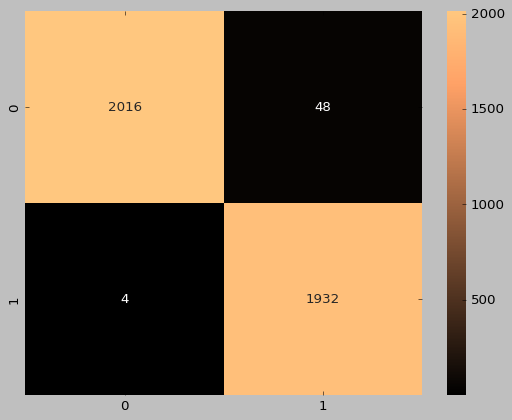

In [36]:
# Generate class probabilities for the test data using the trained ANN model
y_prob_ann = model_ANN.predict(X_test_ann)

# Convert probabilities to class predictions (0 or 1 for binary classification)
ypred_ann = (y_prob_ann > 0.5).astype(int).flatten()  # Using .flatten() to get a 1D array

# Calculate and display the confusion matrix for the ANN predictions
confusion_matrix_calculation(ypred_ann, y_test_ann)

# CNN

Epoch 1/50
500/500 [==============================] - 3s 4ms/step - loss: 0.6238 - accuracy: 0.7848 - val_loss: 0.2330 - val_accuracy: 0.9175
Epoch 2/50
500/500 [==============================] - 2s 4ms/step - loss: 0.3446 - accuracy: 0.8792 - val_loss: 0.1915 - val_accuracy: 0.9293
Epoch 3/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2885 - accuracy: 0.8979 - val_loss: 0.1720 - val_accuracy: 0.9342
Epoch 4/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2481 - accuracy: 0.9085 - val_loss: 0.1606 - val_accuracy: 0.9410
Epoch 5/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2303 - accuracy: 0.9144 - val_loss: 0.1508 - val_accuracy: 0.9435
Epoch 6/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2129 - accuracy: 0.9184 - val_loss: 0.1454 - val_accuracy: 0.9463
Epoch 7/50
500/500 [==============================] - 2s 4ms/step - loss: 0.1978 - accuracy: 0.9261 - val_loss: 0.1352 - val_accuracy: 0.9455
Epoch 

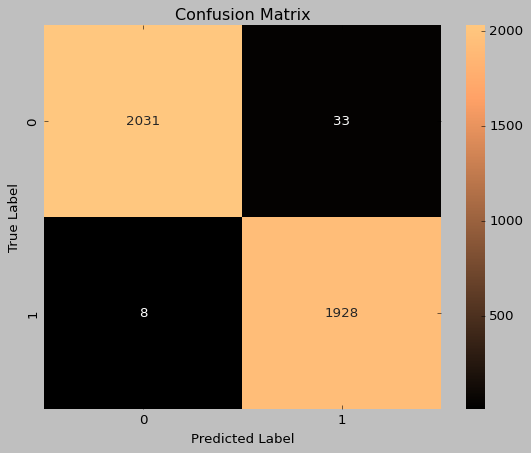

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import numpy as np

# Function to create the CNN model
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.2))
    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Function to train the CNN model
def train_cnn_model(model, X_train, y_train, X_val, y_val, epochs=50):
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), verbose=1)
    return history

# Function to evaluate the CNN model and display the confusion matrix
def evaluate_cnn_model(model, X_test, y_test):
    # Generate class probabilities for the test data
    y_prob_cnn = model.predict(X_test)

    # Convert probabilities to class predictions (0 or 1 for binary classification)
    y_pred_cnn = (y_prob_cnn > 0.5).astype(int).flatten()

    # Calculate and display the confusion matrix
    com_decision = confusion_matrix(y_test, y_pred_cnn)
    print("Confusion Matrix")
    print(com_decision)
    print('Error Rate     : {:.2f}'.format((com_decision[0][1] + com_decision[1][0]) / com_decision.sum() * 100))
    print('Specificity    : {:.2f}'.format(com_decision[1][1] / (com_decision[1][1] + com_decision[0][1]) * 100))
    print('Sensitivity    : {:.2f}'.format(com_decision[0][0] / (com_decision[0][0] + com_decision[1][0]) * 100))
    print('MODEL ACCURACY : {:.2f}'.format((com_decision[0][0] + com_decision[1][1]) / com_decision.sum() * 100))

    # Visualize the confusion matrix using a heatmap with annotations
    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
    sns.heatmap(com_decision, annot=True, fmt='d', cmap=plt.cm.copper)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Standardize the features using StandardScaler
sc = StandardScaler()
X_train_cnn = sc.fit_transform(X_train)
X_test_cnn = sc.transform(X_test)
y_train_cnn = np.copy(y_train)
y_test_cnn = np.copy(y_test)

# Reshape the data for 1D Convolutional Neural Network (Conv1D)
input_shape = (X_train_cnn.shape[1], 1)
X_train_cnn = X_train_cnn.reshape(X_train_cnn.shape[0], *input_shape)
X_test_cnn = X_test_cnn.reshape(X_test_cnn.shape[0], *input_shape)

# Create and train the CNN model
model_CNN = create_cnn_model(input_shape)
history_CNN = train_cnn_model(model_CNN, X_train_cnn, y_train, X_test_cnn, y_test, epochs=50)

# Evaluate the CNN model and display the confusion matrix
evaluate_cnn_model(model_CNN, X_test_cnn, y_test)

# Optionally, you can save the trained model to a file
# model_CNN.save('model_CNN.hdf5')

In [38]:
y_prob_cnn = model.predict(X_test)

# Convert probabilities to class predictions (0 or 1 for binary classification)
ypred_cnn = (y_prob_cnn > 0.5).astype(int).flatten()

In [39]:
# Evaluate the model on the training data
train_loss, train_acc2 = model_CNN.evaluate(X_train_cnn, y_train_cnn, verbose=0)

# Evaluate the model on the test data
test_lostt, test_acc2 = model_CNN.evaluate(X_test_cnn, y_test_cnn, verbose=0)

# Print the results
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc2, test_acc2))

Train Accuracy: 0.992, Test Accuracy: 0.990


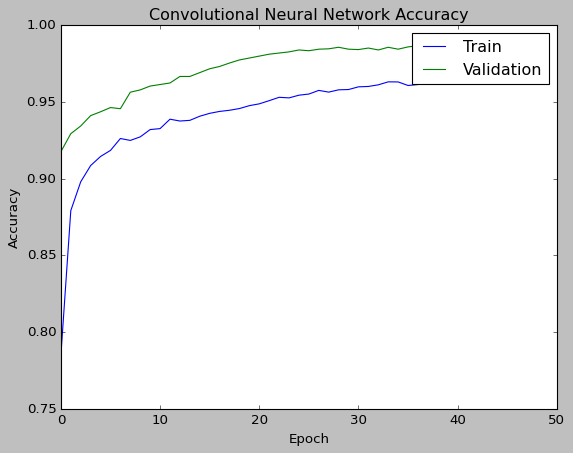

In [40]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history_CNN.history['accuracy'], label='Train')
plt.plot(history_CNN.history['val_accuracy'], label='Validation')
plt.title('Convolutional Neural Network Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

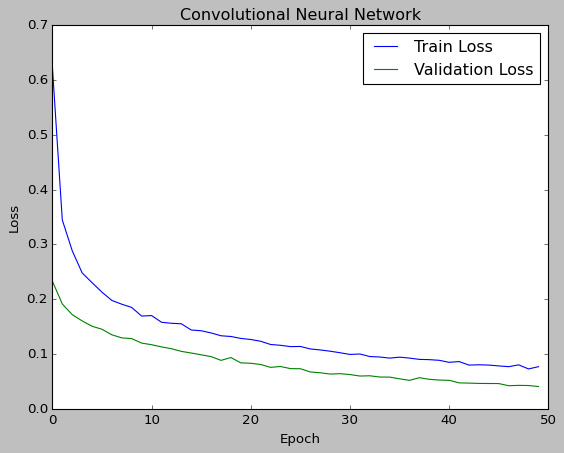

In [41]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history_CNN.history['loss'], label='Train Loss')
plt.plot(history_CNN.history['val_loss'], label='Validation Loss')
plt.title('Convolutional Neural Network')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Recurrent Neural Network

In [42]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Creating copies of the original data to avoid overwriting the original variables
X_train_rnn1 = np.copy(X_train)
X_test_rnn1 = np.copy(X_test)
y_train_rnn = np.copy(y_train)
y_test_rnn = np.copy(y_test)

# Feature scaling using StandardScaler
rc = StandardScaler()
X_train_rnn = rc.fit_transform(X_train_rnn1)
X_test_rnn = rc.transform(X_test_rnn1)

# Reshaping the data for RNN input (assuming X_train and X_test are 2D arrays)
X_train_rnn = X_train_rnn.reshape(X_train_rnn.shape[0], X_train_rnn.shape[1], 1)
X_test_rnn = X_test_rnn.reshape(X_test_rnn.shape[0], X_test_rnn.shape[1], 1)

# Building the RNN model for the dataset
model_RNN = Sequential()
model_RNN.add(SimpleRNN(32, input_shape=X_train_rnn[0].shape, activation="relu"))
model_RNN.add(Dense(8, activation="relu"))
model_RNN.add(Dense(1, activation="sigmoid"))
model_RNN.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_RNN.summary()

# Training the model
history_RNN = model_RNN.fit(X_train_rnn, y_train_rnn, epochs=50, validation_data=(X_test_rnn, y_test_rnn), verbose=1)

# Uncomment the line below if you want to save the model
# model_RNN.save('saved_models/model_RNN.hdf5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense_6 (Dense)             (None, 8)                 264       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2836 - accuracy: 0.8858 - val_loss: 0.1749 - val_accuracy: 0.9342
Epoch 2/50
500/500 [==============================] - 2s 3ms/step - loss: 0.1735 - accuracy: 0.9361 - val_loss: 0.1493 - val_accuracy: 0.9470
Epoch 3/50
500/500 [============

125/125 [==============================] - 0s 1ms/step
Confusion Matrix
[[2024   40]
 [   5 1931]]
Error Rate     : 1.12
Specificity    : 97.97
Sensitivity    : 99.75
MODEL ACCURACY : 98.88


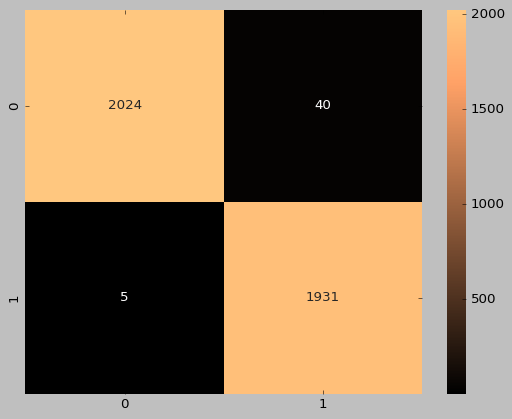

In [43]:
# Generate class probabilities for the test data using the trained ANN model
y_prob_rnn = model_RNN.predict(X_test_rnn)

# Convert probabilities to class predictions (0 or 1 for binary classification)
ypred_rnn = (y_prob_rnn > 0.5).astype(int).flatten()  # Using .flatten() to get a 1D array

# Calculate and display the confusion matrix for the ANN predictions
confusion_matrix_calculation(ypred_rnn, y_test_rnn)

In [44]:
# Evaluate the model on the training data
train_loss, train_acc3 = model_RNN.evaluate(X_train_rnn, y_train_rnn, verbose=0)

# Evaluate the model on the test data
test_loss, test_acc3 = model_RNN.evaluate(X_test_rnn, y_test_rnn, verbose=0)

# Print the results
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc3, test_acc3))

Train Accuracy: 0.993, Test Accuracy: 0.989


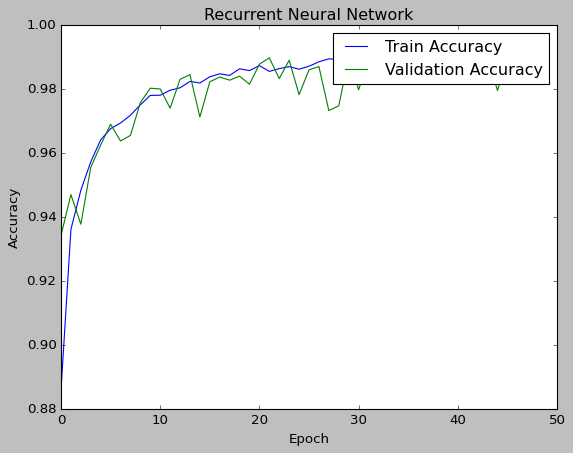

In [45]:
import matplotlib.pyplot as plt

# Plot training accuracy
plt.plot(history_RNN.history['accuracy'], label='Train Accuracy')

# Plot validation accuracy
plt.plot(history_RNN.history['val_accuracy'], label='Validation Accuracy')

# Set plot title and labels
plt.title('Recurrent Neural Network')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Show the plot
plt.show()

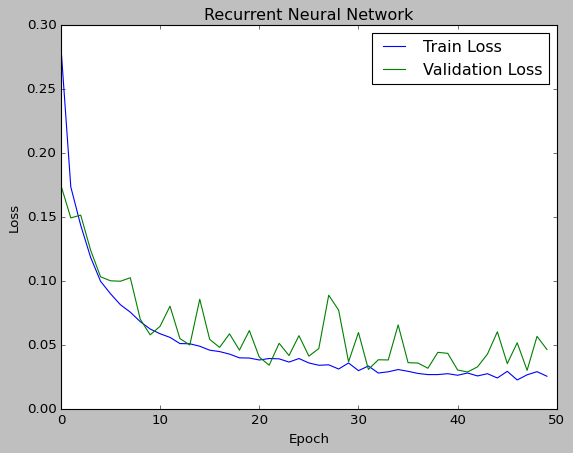

In [46]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history_RNN.history['loss'], label='Train Loss')

# Plot validation loss
plt.plot(history_RNN.history['val_loss'], label='Validation Loss')

# Set plot title and labels
plt.title('Recurrent Neural Network')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Show the plot
plt.show()

# Long Short Term Memory

In [47]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Create copies of the original data to avoid modifying them
X_train_lstm1 = X_train.copy()
X_test_lstm1 = X_test.copy()
y_train_lstm = y_train.copy()
y_test_lstm = y_test.copy()

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_lstm = scaler.fit_transform(X_train_lstm1)
X_test_lstm = scaler.transform(X_test_lstm1)

# Reshape the data for LSTM input
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], 1, X_train_lstm.shape[1])
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], 1, X_test_lstm.shape[1])

# Building LSTM model for the dataset
model_LSTM = Sequential()
model_LSTM.add(LSTM(100, input_shape=X_train_lstm[0].shape, return_sequences=True, activation="relu"))
model_LSTM.add(LSTM(50, return_sequences=True, activation="relu"))
model_LSTM.add(Dense(16, activation="relu"))
model_LSTM.add(Dense(1, activation="sigmoid"))  # Use sigmoid activation for binary classification
model_LSTM.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_LSTM.summary()

# Train the model with the data
history_LSTM = model_LSTM.fit(X_train_lstm, y_train_lstm, epochs=50, validation_data=(X_test_lstm, y_test_lstm), verbose=1)

# Save the trained model (optional)
# model_LSTM.save('model_LSTM.h5')


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            52400     
                                                                 
 lstm_1 (LSTM)               (None, 1, 50)             30200     
                                                                 
 dense_8 (Dense)             (None, 1, 16)             816       
                                                                 
 dense_9 (Dense)             (None, 1, 1)              17        
                                                                 
Total params: 83,433
Trainable params: 83,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
500/500 [==============================] - 3s 3ms/step - loss: 0.2141 - accuracy: 0.9252 - val_loss: 0.1276 - val_accuracy: 0.9445
Epoch 2/50
500/500 [====================

In [48]:
# Evaluate the model on the training data
dummy, train_acc4 = model_LSTM.evaluate(X_train_lstm, y_train_lstm, verbose=0)

# Evaluate the model on the test data
dummy, test_acc4 = model_LSTM.evaluate(X_test_lstm, y_test_lstm, verbose=0)

# Print the results
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc4, test_acc4))

Train Accuracy: 1.000, Test Accuracy: 0.997


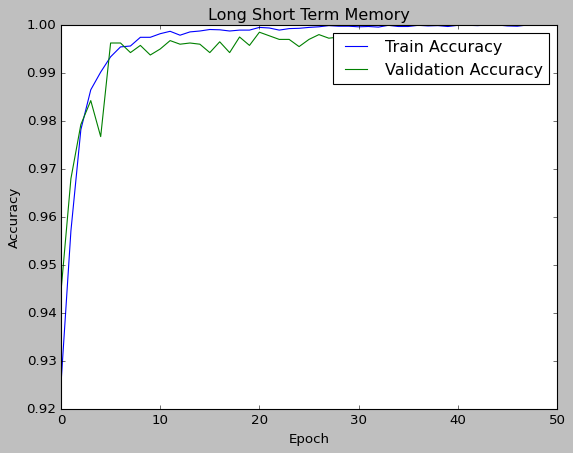

In [49]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_LSTM.history['val_accuracy'])

# Add plot title and labels for axes
plt.title('Long Short Term Memory')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Add a legend to distinguish between training and validation accuracy
plt.legend(['Train Accuracy', 'Validation Accuracy'])

# Display the plot
plt.show()

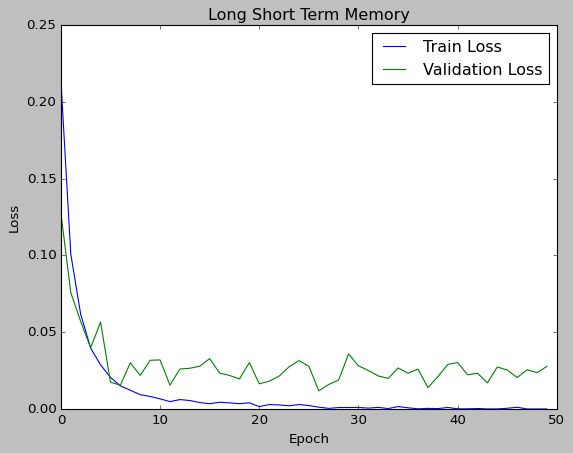

In [50]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])

# Add plot title and labels for axes
plt.title('Long Short Term Memory')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Add a legend to distinguish between training and validation loss
plt.legend(['Train Loss', 'Validation Loss'])

# Display the plot
plt.show()

125/125 [==============================] - 0s 1ms/step
Confusion Matrix
[[2052   12]
 [   0 1936]]
Error Rate     : 0.30
Specificity    : 99.38
Sensitivity    : 100.00
MODEL ACCURACY : 99.70


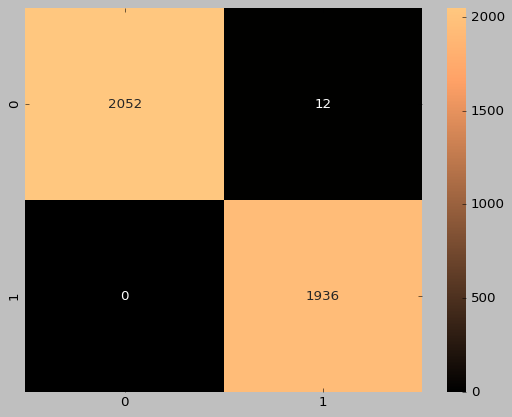

In [51]:
# Generate class probabilities for the test data using the trained LSTM model
y_prob_lstm = model_LSTM.predict(X_test_lstm)

# Convert probabilities to class predictions (0 or 1 for binary classification)
ypred_lstm = (y_prob_lstm > 0.5).astype(int).flatten()  # Using .flatten() to get a 1D array

# Calculate and display the confusion matrix for the ANN predictions
confusion_matrix_calculation(ypred_lstm, y_test_lstm)

# Gated Recurrent Unit

In [52]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import GRU, Dense

# Create copies of the original data to avoid modifying them
X_train_gru = X_train.copy()
X_test_gru = X_test.copy()
y_train_gru = y_train.copy()
y_test_gru = y_test.copy()

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_gru = scaler.fit_transform(X_train_gru)
X_test_gru = scaler.transform(X_test_gru)

# Reshape the data for GRU input
input_shape = (X_train_gru.shape[1], 1)  # For compatibility with various input shapes
X_train_gru = X_train_gru.reshape((-1, *input_shape))
X_test_gru = X_test_gru.reshape((-1, *input_shape))

# Building GRU model for the dataset
model_GRU = Sequential([
    GRU(100, input_shape=input_shape, return_sequences=True, activation="relu"),
    GRU(50, return_sequences=False, activation="relu"),  # Set return_sequences=False
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])


# Compile the model with the chosen optimizer, loss function, and metrics.
model_GRU.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_GRU.summary()

# Train the model with the data
history_GRU = model_GRU.fit(X_train_gru, y_train_gru, epochs=50, validation_data=(X_test_gru, y_test_gru), verbose=1)

# Save the trained model (optional)
# model_GRU.save('model_GRU.h5')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 100)           30900     
                                                                 
 gru_1 (GRU)                 (None, 50)                22800     
                                                                 
 dense_10 (Dense)            (None, 16)                816       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 54,533
Trainable params: 54,533
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
500/500 [==============================] - 17s 31ms/step - loss: 0.4453 - accuracy: 0.7940 - val_loss: 0.2548 - val_accuracy: 0.9022
Epoch 2/50
500/500 [==================

In [53]:
# Evaluate the model on the training data
train_loss5, train_acc5 = model_GRU.evaluate(X_train_gru, y_train_gru, verbose=0)

# Evaluate the model on the test data
test_loss5, test_acc5 = model_GRU.evaluate(X_test_gru, y_test_gru, verbose=0)

# Print the results
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc5, test_acc5))

Train Accuracy: 0.999, Test Accuracy: 0.996


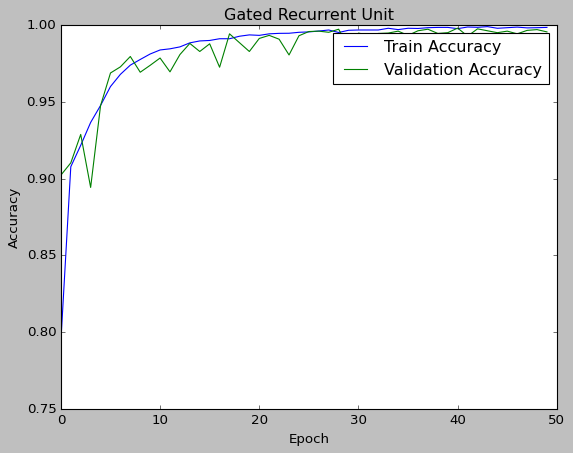

In [54]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history_GRU.history['accuracy'])
plt.plot(history_GRU.history['val_accuracy'])

# Add plot title and labels for axes
plt.title('Gated Recurrent Unit')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Add a legend to distinguish between training and validation accuracy
plt.legend(['Train Accuracy', 'Validation Accuracy'])

# Display the plot
plt.show()

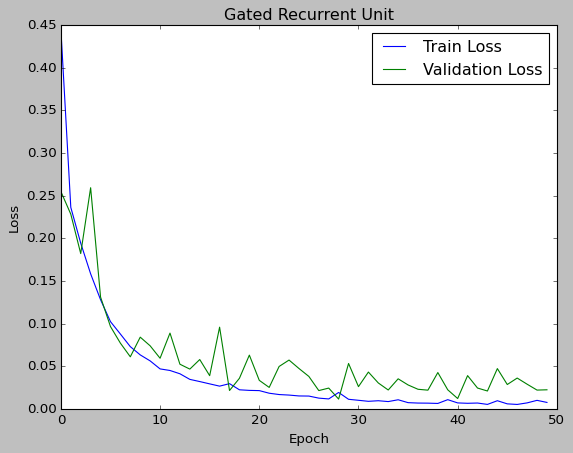

In [55]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history_GRU.history['loss'])
plt.plot(history_GRU.history['val_loss'])

# Add plot title and labels for axes
plt.title('Gated Recurrent Unit')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Add a legend to distinguish between training and validation loss
plt.legend(['Train Loss', 'Validation Loss'])

# Display the plot
plt.show()

125/125 [==============================] - 1s 6ms/step
Confusion Matrix
[[2052   12]
 [   6 1930]]
Error Rate     : 0.45
Specificity    : 99.38
Sensitivity    : 99.71
MODEL ACCURACY : 99.55


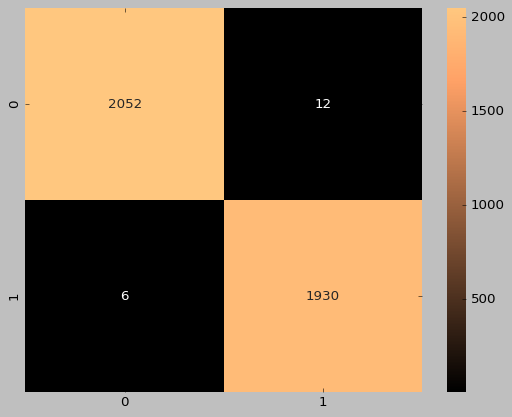

In [56]:
# Generate class probabilities for the test data using the trained LSTM model
y_prob_gru = model_GRU.predict(X_test_gru)

# Convert probabilities to class predictions (0 or 1 for binary classification)
ypred_gru = (y_prob_gru > 0.5).astype(int).flatten()  # Using .flatten() to get a 1D array

# Calculate and display the confusion matrix for the ANN predictions
confusion_matrix_calculation(ypred_gru, y_test_gru)

# Performance Evaluation 

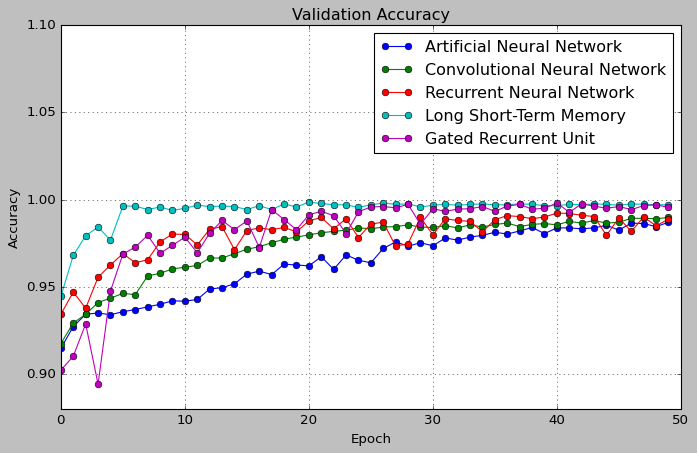

In [57]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name, metric='accuracy', plot_loss=False):
    plt.plot(history.history[metric], label=model_name, linestyle='-', marker='o')

    if plot_loss:
        plt.plot(history.history['val_loss'], label=model_name + ' (Loss)', linestyle='--', marker='x')

# Increase the figure size for better visualization
plt.figure(figsize=(10, 6))

# Plot the validation accuracy for each model
plot_training_history(history_ANN, 'Artificial Neural Network', metric='val_accuracy')
plot_training_history(history_CNN, 'Convolutional Neural Network', metric='val_accuracy')
plot_training_history(history_RNN, 'Recurrent Neural Network', metric='val_accuracy')
plot_training_history(history_LSTM, 'Long Short-Term Memory', metric='val_accuracy')
plot_training_history(history_GRU, 'Gated Recurrent Unit', metric='val_accuracy')

# Add grid, title, labels, and legend to the plot
plt.grid(True)
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Set the y-axis limit to have a maximum value of 1.1 (as accuracy is between 0 and 1)
plt.ylim(top=1.1)

# Display the plot
plt.show()

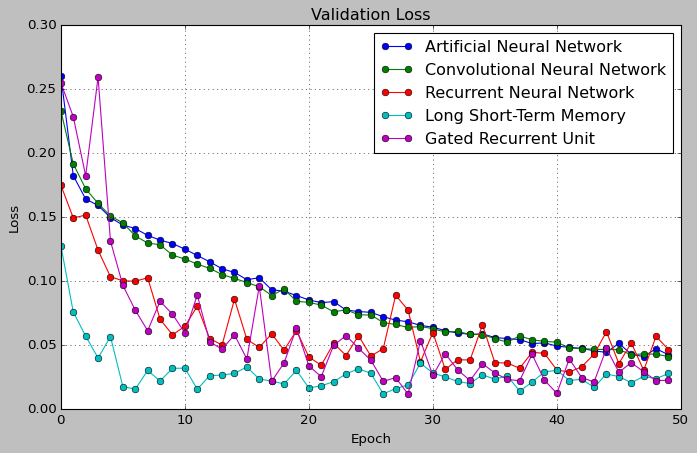

In [58]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name, metric='loss', plot_accuracy=False):
    plt.plot(history.history[metric], label=model_name, linestyle='-', marker='o')

    if plot_accuracy:
        plt.plot(history.history['val_accuracy'], label=model_name + ' (Accuracy)', linestyle='--', marker='x')

# Increase the figure size for better visualization
plt.figure(figsize=(10, 6))

# Plot the validation loss for each model
plot_training_history(history_ANN, 'Artificial Neural Network', metric='val_loss')
plot_training_history(history_CNN, 'Convolutional Neural Network', metric='val_loss')
plot_training_history(history_RNN, 'Recurrent Neural Network', metric='val_loss')
plot_training_history(history_LSTM, 'Long Short-Term Memory', metric='val_loss')
plot_training_history(history_GRU, 'Gated Recurrent Unit', metric='val_loss')

# Add grid, title, labels, and legend to the plot
plt.grid(True)
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Set the y-axis limit to avoid negative values for loss
plt.ylim(bottom=0)

# Display the plot
plt.show()


# Ensemble Voting Classifier:

In [59]:
ypred_ann_cnn_rnn_lstm_gru = np.column_stack((ypred_lstm, ypred_gru, ypred_ann, ypred_cnn, ypred_rnn))
print('Models prediction array: \n', ypred_ann_cnn_rnn_lstm_gru)

Models prediction array: 
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 0 0 0]
 ...
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [60]:
import numpy as np
from typing import List, Tuple

def voting_classifier(ypred: np.ndarray, ytest: List[int], voting_type: str) -> Tuple[List[int], List[int]]:
    if voting_type == "hard":
        y_predict = np.apply_along_axis(lambda row: np.argmax(np.bincount(row)), axis=1, arr=ypred)
    elif voting_type == "soft":
        y_predict = np.mean(ypred, axis=1) >= 0.5
        y_predict = y_predict.astype(int)
    else:
        raise ValueError("Invalid voting_type. Use 'hard' or 'soft'.")

    return y_predict.tolist(), ytest

predict_by_vote_hard, target_hard=voting_classifier(ypred_ann_cnn_rnn_lstm_gru, y_test, 'hard')
predict_by_vote_soft, target_soft=voting_classifier(ypred_ann_cnn_rnn_lstm_gru, y_test, 'soft')

Confusion Matrix
[[2058    6]
 [   0 1936]]
Error Rate     : 0.15
Specificity    : 99.69
Sensitivity    : 100.00
MODEL ACCURACY : 99.85


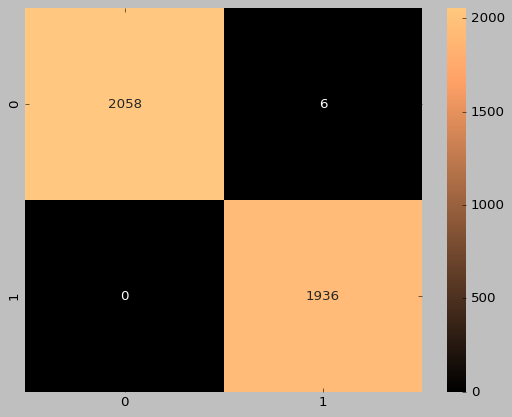

In [61]:
confusion_matrix_calculation(predict_by_vote_hard, target_hard)

Confusion Matrix
[[2058    6]
 [   0 1936]]
Error Rate     : 0.15
Specificity    : 99.69
Sensitivity    : 100.00
MODEL ACCURACY : 99.85


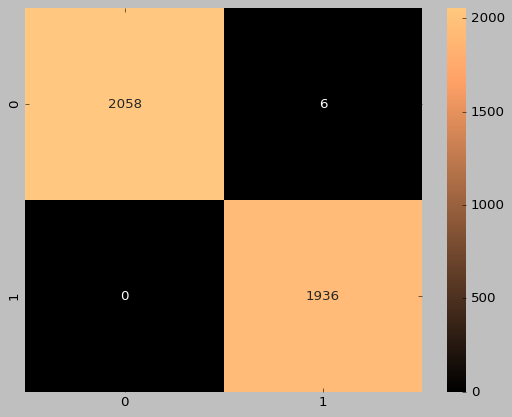

In [62]:
confusion_matrix_calculation(predict_by_vote_soft, target_soft)

In [69]:
# machine learning accuracies LR, SVC, DT, RF, KNN
Accuracy_all_MODEL=[0.96, 0.97, 0.96, 1, 0.99]

Accuracy_all_MODEL.append(test_acc)
Accuracy_all_MODEL.append(test_acc2)
Accuracy_all_MODEL.append(test_acc3)
Accuracy_all_MODEL.append(test_acc4)
Accuracy_all_MODEL.append(test_acc5)

### Accuracy of All Machine Learning and Deep Learning Models

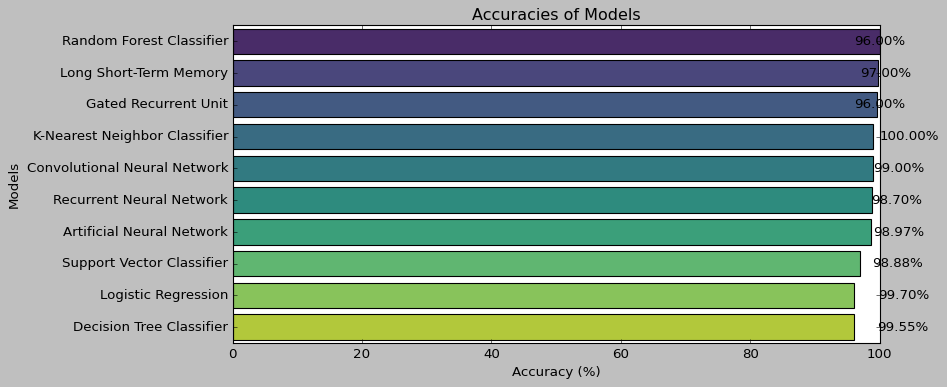

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Use list comprehension for the first part
ACCURACY_ALL_MODELS = [round(number * 100, 3) for number in Accuracy_all_MODEL]

# 2. Use a tuple for MODEL names
MODEL = (
    'Logistic Regression',
    'Support Vector Classifier',
    'Decision Tree Classifier',
    'Random Forest Classifier',
    'K-Nearest Neighbor Classifier',
    'Artificial Neural Network',
    'Convolutional Neural Network',
    'Recurrent Neural Network',
    'Long Short-Term Memory',
    'Gated Recurrent Unit',
)

# Create the DataFrame
df1 = pd.DataFrame({'Models': MODEL, 'Accuracy': ACCURACY_ALL_MODELS})

# Sort the DataFrame based on accuracy
df1.sort_values(by='Accuracy', ascending=False, inplace=True)

# Create a horizontal bar chart with colored bars using Seaborn
plt.figure(figsize=(12, 5))
sns.barplot(x='Accuracy', y='Models', data=df1, palette='viridis')

# Add accuracy values to the bars
for index, row in df1.iterrows():
    plt.text(row['Accuracy'], index, f'{row["Accuracy"]:.2f}%', va='center')

plt.xlabel("Accuracy (%)")
plt.ylabel("Models")
plt.title("Accuracies of Models")
plt.tight_layout()
plt.show()
